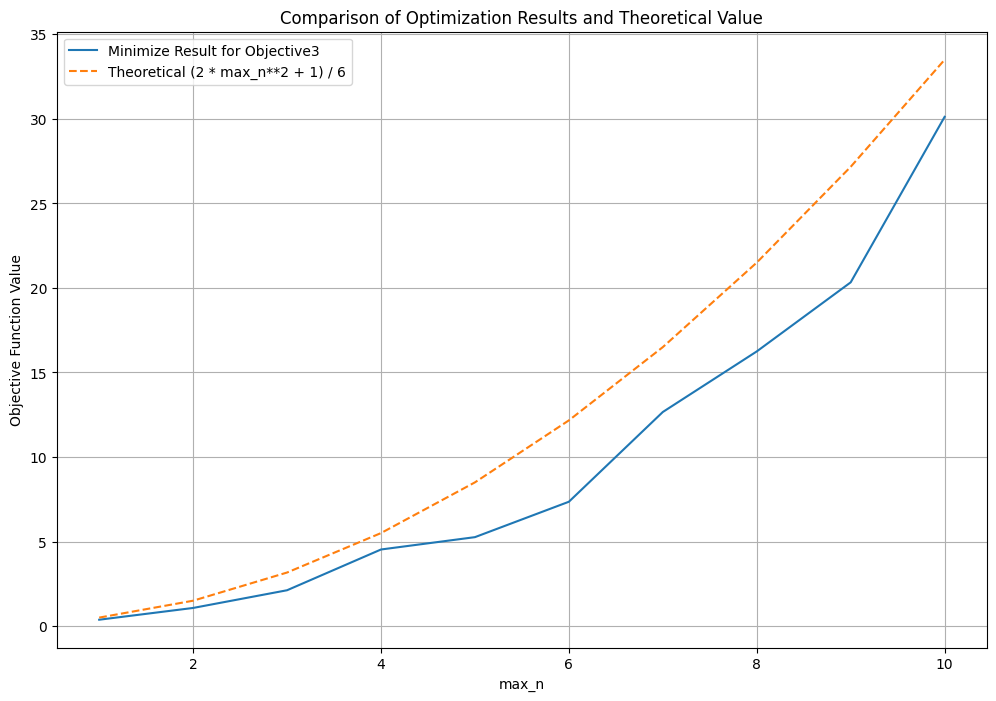

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 你提供的函数
def interp_matrix(theta_vals, max_n):
    return np.array([[1/np.sqrt(2)] + [func(k * val) for k in range(1, max_n + 1) for func in (np.cos, np.sin)] for val in theta_vals])

def define_vector_t(x, max_n):
    vector = [0]
    for i in range(1, max_n + 1):
        vector.append(-i * np.sin(i * x))
        vector.append(i * np.cos(i * x))
    return np.array(vector)

def objective1(theta_vals, x, max_n):
    A = interp_matrix(theta_vals, max_n)
    Var = np.linalg.inv(A.T @ A)
    t = define_vector_t(x, max_n)
    return np.dot(t.T, np.dot(Var, t))

def objective2(theta_vals, x, max_n):
    A = interp_matrix(theta_vals, max_n)
    invAT = np.linalg.inv(A.T)
    t = define_vector_t(x, max_n)
    invATt = np.dot(invAT, t)
    return np.dot(invATt, invATt)

def vandermonde_matrix(x, column_major=False):
    n = len(x)
    V = np.zeros((n, n), dtype=complex)
    for i in range(n):
        for j in range(n):
            V[i, j] = x[j] ** i
    return V.T if column_major else V

def objective3(theta_vals, x, max_n):
    w = [np.exp(1j * theta) for theta in theta_vals]
    V = vandermonde_matrix(w, column_major=True)
    y = np.array([k * np.exp(-1j * k * x) for k in range(max_n, 0, -1)] + [0] + [-k * np.exp(1j * k * x) for k in range(1, max_n + 1)])
    invV = np.linalg.inv(V)
    yinvV = y.conj().T @ invV
    return np.linalg.norm(yinvV, 2) ** 2

# 对不同的 max_n 值计算最优值并与理论值比较
max_n_values = range(1, 11)
minimize_results_obj1 = []
minimize_results_obj2 = []
minimize_results_obj3 = []
theoretical_values = []

x = 0

for max_n in max_n_values:
    theta_vals_init = np.random.uniform(0, 2 * np.pi, 2 * max_n + 1)
    
    # result_obj1 = minimize(objective1, theta_vals_init, args=(x, max_n), method='BFGS').fun
    # result_obj2 = minimize(objective2, theta_vals_init, args=(x, max_n), method='BFGS').fun
    result_obj3 = minimize(objective3, theta_vals_init, args=(x, max_n), method='BFGS').fun
    
    # minimize_results_obj1.append(result_obj1)
    # minimize_results_obj2.append(result_obj2)
    minimize_results_obj3.append(result_obj3)
    
    theoretical_value = (2 * max_n**2 + 1) / 6
    theoretical_values.append(theoretical_value)

# 绘图
plt.figure(figsize=(12, 8))
# plt.plot(max_n_values, minimize_results_obj1, label='Minimize Result for Objective1')
# plt.plot(max_n_values, minimize_results_obj2, label='Minimize Result for Objective2')
plt.plot(max_n_values, minimize_results_obj3, label='Minimize Result for Objective3')
plt.plot(max_n_values, theoretical_values, label='Theoretical (2 * max_n**2 + 1) / 6', linestyle='--')

plt.xlabel('max_n')
plt.ylabel('Objective Function Value')
plt.title('Comparison of Optimization Results and Theoretical Value')
plt.legend()
plt.grid(True)
plt.show()


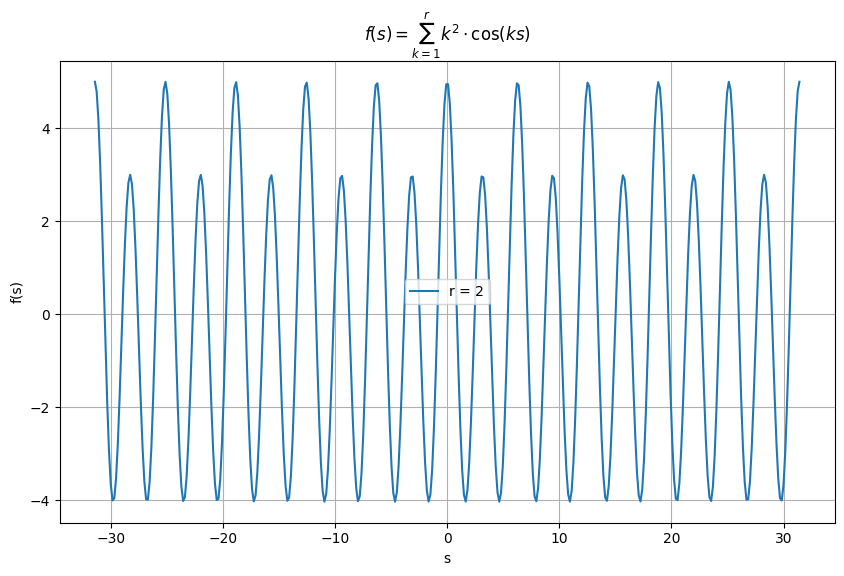

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(s, r):
    return sum(k**2 * np.cos(k * s) for k in range(1, r+1))

# 定义 s 的范围
s_values = np.linspace(-10 * np.pi, 10 * np.pi, 400)

# 定义 r 的值
r = 2

# 计算 f(s) 对应的值
f_values = [f(s, r) for s in s_values]

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(s_values, f_values, label=f'r = {r}')
plt.title(r'$f(s) = \sum_{k=1}^r k^2 \cdot \cos(ks)$')
plt.xlabel('s')
plt.ylabel('f(s)')
plt.grid(True)
plt.legend()
plt.show()


In [46]:
import numpy as np
import random

def left_hand_side(r, s):
    return sum(k**2 * np.cos(k * s) for k in range(1, r + 1))

def right_hand_side(r, s):
    numerator = 0.5 * ((2 * r**2 + 2 * r - 1) * np.sin((r + 0.5) * s) -
                 (r + 1)**2 * np.sin((r - 0.5) * s) -
                 r**2 * np.sin((r + 1.5) * s))
    
    denominator = 4 * np.sin(0.5 * s) ** 3
    
    return numerator / denominator

def verify_equation(r, s):
    lhs = left_hand_side(r, s)
    rhs = right_hand_side(r, s)
    return np.isclose(lhs, rhs, atol=1e-9)

# 随机选择 r 和 s，进行多次验证
for _ in range(10):  # 验证 5 次
    r = random.randint(1, 20)  # 随机选择 r 值，范围为 1 到 20
    s = random.uniform(0, 2 * np.pi)  # 随机选择 s 值，范围为 0 到 2π
    
    is_valid = verify_equation(r, s)
    print(f"r = {r}, s = {s:.4f} -> 等式是否成立: {is_valid}")


r = 16, s = 3.9559 -> 等式是否成立: True
r = 17, s = 6.1804 -> 等式是否成立: True
r = 19, s = 0.7821 -> 等式是否成立: True
r = 1, s = 1.8141 -> 等式是否成立: True
r = 7, s = 3.6682 -> 等式是否成立: True
r = 11, s = 2.6508 -> 等式是否成立: True
r = 16, s = 1.8260 -> 等式是否成立: True
r = 12, s = 4.6409 -> 等式是否成立: True
r = 14, s = 0.2840 -> 等式是否成立: True
r = 15, s = 0.3918 -> 等式是否成立: True
